In [26]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import save_model

In [27]:
df = pd.read_csv("Student_performance_data _.csv")

In [28]:
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [48]:
df['ParentalSupport'].value_counts()

ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64

In [50]:
df['Ethnicity'].value_counts()

Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64

In [51]:
df['ParentalEducation'].value_counts()

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

In [52]:
df['Extracurricular'].value_counts()

Extracurricular
0    1475
1     917
Name: count, dtype: int64

In [53]:
df['Sports'].value_counts()

Sports
0    1666
1     726
Name: count, dtype: int64

In [54]:
df['Music'].value_counts()

Music
0    1921
1     471
Name: count, dtype: int64

In [55]:
df['Volunteering'].value_counts()

Volunteering
0    2016
1     376
Name: count, dtype: int64

In [29]:
df.shape

(2392, 15)

In [30]:
features = df.drop(columns=['GPA', 'GradeClass', 'StudentID'])
target = df['GPA']

In [42]:
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences']

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [45]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.save('model.keras')


In [21]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

import pickle
from tensorflow.keras.models import save_model

# Save the preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save the model with specified metric
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
save_model(model, 'model.h5')

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0989 - mse: 0.0989 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1113 - mse: 0.1113 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1073 - mse: 0.1073 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1278 - mse: 0.1278 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1053 - mse: 0.1053 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1116 - mse: 0.1116 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1114 - mse: 0.1114 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1125 - mse: 0.1125 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.111

In [13]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0449 - mae: 0.1646
Test MAE: 0.1625535935163498


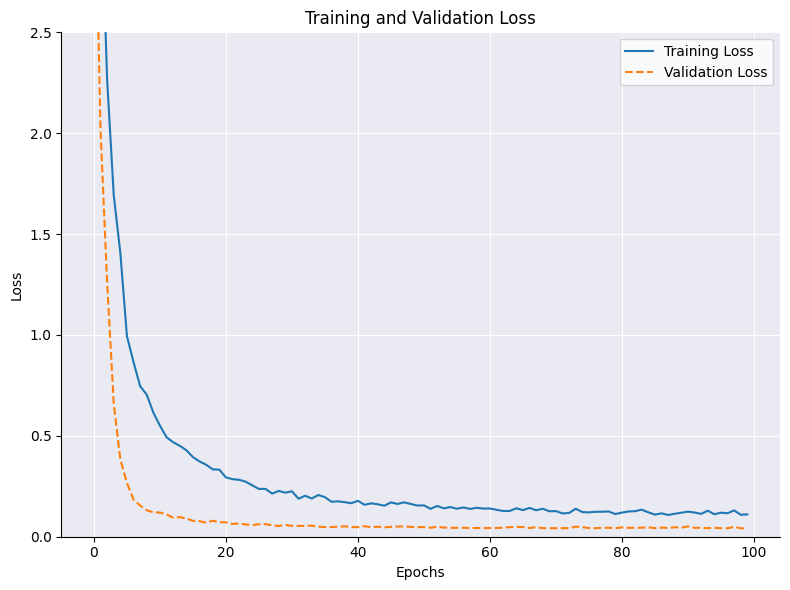

In [14]:
# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
ax.plot(history_df['loss'], label='Training Loss', color='#1f77b4')
ax.plot(history_df['val_loss'], label='Validation Loss', color='#ff7f0e', linestyle='--')

# Customize the plot
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss')
ax.legend()

# Set y-axis limit
ax.set_ylim(0, 2.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid
ax.grid(True, color='white', linestyle='-', linewidth=0.7)
ax.set_axisbelow(True)

# Set background color
ax.set_facecolor('#eaeaf2')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [15]:
#### Custom predictor function
def custom_predictor(input_data):
    """
    This function takes a DataFrame input_data with the same structure as the training data (except 'GPA' and 'GradeClass')
    and returns the predicted GPA.
    """
    input_data_processed = preprocessor.transform(input_data)
    predictions = model.predict(input_data_processed)
    return predictions

# Example usage of the custom predictor
# Create a sample input data for prediction (you can replace this with actual test data)
sample_input = pd.DataFrame({
    'Age': [18],
    'Gender': [1],
    'Ethnicity': [1],
    'ParentalEducation': [1],
    'StudyTimeWeekly': [10],
    'Absences': [5],
    'Tutoring': [1],
    'ParentalSupport': [0],
    'Extracurricular': [0],
    'Sports': [0],
    'Music': [1],
    'Volunteering': [0]
})

# Get the prediction for the sample input
predicted_gpa = custom_predictor(sample_input)
print(f'Predicted GPA: {predicted_gpa[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted GPA: 2.7425994873046875
